In [2]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from copy import deepcopy

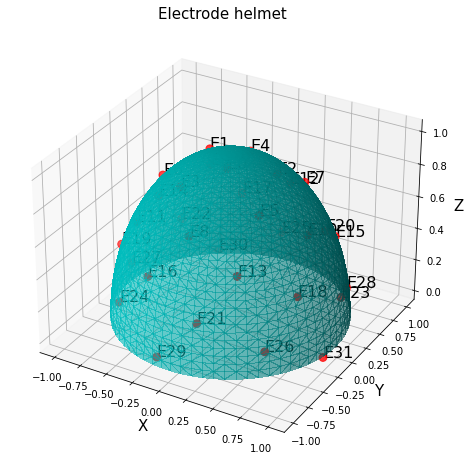

In [3]:
# ELECTRODE HELMET


r = 1

pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:70j, 0.0:2.0*pi:70j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

# upper hemisphere
x=x[z>0]
y=y[z>0]
z=z[z>0]



#Set colours and render
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


#ax.plot_surface( x, y, z, rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0 )
ax.plot_trisurf(x,y,z, linewidth=0, antialiased=False, color='c', alpha=0.6)



# Plot evenly distributed points on sphere
num_pts = 64
#r=20

indices = np.arange(0, num_pts, dtype=float) + 0.5

phi = np.arccos(1 - 2*indices/num_pts)
theta = np.pi * (1 + 5**0.5) * indices

xx, yy, zz = r*np.cos(theta) * np.sin(phi), r*np.sin(theta) * np.sin(phi), r*np.cos(phi);

# upper hemisphere
xx = xx[zz>0]
yy = yy[zz>0]
zz = zz[zz>0]
ax.scatter(xx,yy,zz, color="red", s=60)



for i in range(len(xx)): #plot each point + it's index as text above
    ax.text(xx[i],yy[i],zz[i], 'E%d'%i, size=16, zorder=1,color='k') 

ax.set_xlabel("X", size=15)    
ax.set_ylabel("Y", size=15)    
ax.set_zlabel("Z", size=15)    

plt.title("Electrode helmet ", size=15)
#plt.savefig("electrode_helmet.png", dpi=300, facecolor="white", bbox_inches="tight")



plt.show()





Voxel size:  0.0 0.0 0.4


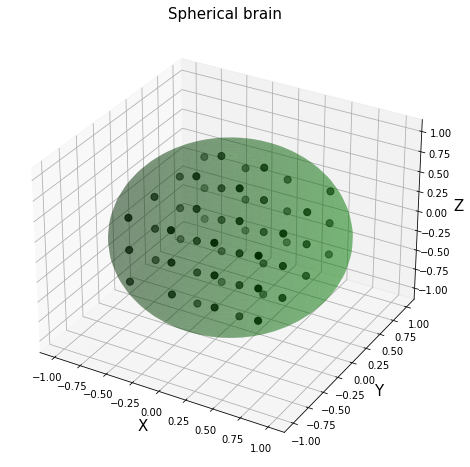

In [4]:
r = 1
zAxis_shift = 0 # alignment according to helmet


pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:50j, 0.0:2.0*pi:50j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)+zAxis_shift

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# plotting the surface of the brain
ax.plot_surface( x, y, z, rstride=1, cstride=1, color='green', alpha=0.3, linewidth=0 )


############################################

# encapsulating a cube on top of a sphere
s = 2*r # side of cube is twice the radius

npoints = 6 # number of  lattice points on the side of a cube


cx = np.linspace(-s/2,s/2,npoints )
cy = np.linspace(-s/2,s/2,npoints )
cz = np.linspace(-s/2,s/2,npoints )

coordinates = []

for x in cx:
    for y in cy:
        for z in cz:
            coordinates.append([x,y,z])
coordinates = np.array(coordinates)

# coordinates of the cubic lattice encapsulating a sphere
xv, yv, zv = coordinates[:,0], coordinates[:,1], coordinates[:,2]

# voxel size
dx = xv[1]-xv[0]
dy = yv[1]-yv[0]
dz = zv[1]-zv[0]

print("Voxel size: ",dx, dy, dz)
# mid points of a voxel of size 
src_x = xv+dx/2
src_y = yv+dy/2
src_z = zv+dz/2
#src_z = src_z #+ zAxis_shift


ind=np.array((src_x**2 + src_y**2 + src_z**2) <= r**2)
src_x, src_y, src_z = src_x[ind], src_y[ind], src_z[ind]
src_z+=zAxis_shift

#######################################

ax.scatter(src_x, src_y, src_z, color="black", s=50)
ax.set_xlabel("X", size=15)    
ax.set_ylabel("Y", size=15)    
ax.set_zlabel("Z", size=15)    

plt.title("Spherical brain", size=15)
#plt.savefig("spherical_brain.png", dpi=300, facecolor="white", bbox_inches="tight")
plt.show()

Number of source points:  12


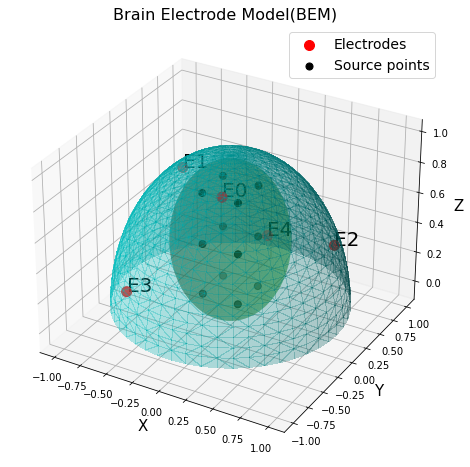

In [5]:
# Brain as a spherical model + source points of voxels inside a brain

# radius of brain, typically half the radius of electrode helmet
r = 0.5
zAxis_shift = 0.45 # alignment according to helmet


pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:50j, 0.0:2.0*pi:50j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)+zAxis_shift

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# plotting the surface of the brain
ax.plot_surface( x, y, z, rstride=1, cstride=1, color='green', alpha=0.3, linewidth=0 )


############################################

# encapsulating a cube on top of a sphere
s = 2*r # side of cube is twice the radius

npoints = 4 # number of  lattice points on the side of a cube


cx = np.linspace(-s/2,s/2,npoints )
cy = np.linspace(-s/2,s/2,npoints )
cz = np.linspace(-s/2,s/2,npoints )

coordinates = []

for x in cx:
    for y in cy:
        for z in cz:
            coordinates.append([x,y,z])
coordinates = np.array(coordinates)

# coordinates of the cubic lattice encapsulating a sphere
xv, yv, zv = coordinates[:,0], coordinates[:,1], coordinates[:,2]

# voxel size
dx = xv[1]-xv[0]
dy = yv[1]-yv[0]
dz = zv[1]-zv[0]


# mid points of a voxel of size 
src_x = xv+dx/2
src_y = yv+dy/2
src_z = zv+dz/2
#src_z = src_z #+ zAxis_shift


ind=np.array((src_x**2 + src_y**2 + src_z**2) <= r**2)
src_x, src_y, src_z = src_x[ind], src_y[ind], src_z[ind]
src_z+=zAxis_shift

#######################################

ax.scatter(src_x, src_y, src_z, color="black", s=50)
print("Number of source points: ", len(src_x))




###############################################################################


# ELECTRODE HELMET


r = 1

pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:50j, 0.0:2.0*pi:50j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

# upper hemisphere
x=x[z>0]
y=y[z>0]
z=z[z>0]



#ax.plot_surface( x, y, z, rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0 )
ax.plot_trisurf(x,y,z, linewidth=0, antialiased=False, color='c', alpha=0.3)

# Plot evenly distributed points on sphere
num_pts = 10
# on a hemisphere, the number becomes half, as we are plotting hemisphere
#r=20

indices = np.arange(0, num_pts, dtype=float) + 0.5

phi = np.arccos(1 - 2*indices/num_pts)
theta = np.pi * (1 + 5**0.5) * indices

xx, yy, zz = r*np.cos(theta) * np.sin(phi), r*np.sin(theta) * np.sin(phi), r*np.cos(phi);

# upper hemisphere
xx = xx[zz>0]
yy = yy[zz>0]
zz = zz[zz>0]

ax.scatter(xx,yy,zz, color="red", s=100)
for i in range(len(xx)): #plot each point + it's index as text above
    ax.text(xx[i],yy[i],zz[i], 'E%d'%i, size=20, zorder=1,color='k') 

ax.scatter([],[],[], color="red", s=100, label="Electrodes")
ax.scatter([],[],[], color="black", s=50, label="Source points")

ax.set_xlabel("X", size=15)    
ax.set_ylabel("Y", size=15)    
ax.set_zlabel("Z", size=15)    

plt.legend(loc="best", prop={"size":14})
plt.title("Brain Electrode Model(BEM)", size=16)
#plt.savefig("bem.png", dpi=300, facecolor="white", bbox_inches="tight")


plt.show()


In [6]:
# electrode coordinates
electrode_xyz = np.array( list( zip(xx,yy,zz) ) )

# Source points coordinates
source_xyz = np.array( list( zip(src_x, src_y, src_z) ) )

In [7]:
from numpy.linalg import norm
from scipy.spatial import distance
A = np.zeros((len(electrode_xyz), len(source_xyz)))

numElec = len(electrode_xyz)

numSrc = len(source_xyz)


for i in range(len(electrode_xyz)):
    for j in range(len(source_xyz)):
        
        Ei = electrode_xyz[i]
        Sj = source_xyz[j]
        dij = distance.euclidean(Ei, Sj)
        # inverse distance weighting
        A[i][j] = 1/dij**2  #np.dot(Ei,Sj)#/(norm(Ei)*norm(Sj))
        

In [8]:
A_copy = deepcopy(A)

A_norm = (A_copy - np.min(A))/(np.max(A)-np.min(A))


In [9]:
np.linalg.matrix_rank(A_norm )

5

In [10]:

# optimal sampling frequency
sampling_freq = 512


time = np.arange(0.1, 1, 1/sampling_freq)
np.random.seed(123)
#f = 30

# randomly choose frequency between 20 to 50 and generate source signals
src_freq = np.array([np.random.choice([20,30,40,50]) for i in range(numSrc)])

w = 2*np.pi*src_freq
  
src_signal = np.cos( np.dot(w.reshape(-1,1),np.matrix(time)) ) # dimension == signal values x time
src_signal = np.array(src_signal)

eeg_signals = np.zeros((numElec, len(time)))

p = 2

# VAR process for source signal, VAR p=2
sn = np.zeros((numSrc, len(time)))

coef = np.sort(np.random.uniform(low=0.0, high=0.6, size=(numSrc,2)))#[::-1]
coef = np.sort(coef, axis=1)

# time shifted by 2, index is 3rd
noise = np.random.normal(loc=0.0, scale=0.1, size=numSrc)    
sn[:,0] = (coef[:,0]*src_signal[:,0] + coef[:,1]*src_signal[:,1]  + noise)

noise = np.random.normal(loc=0.0, scale=0.1, size=numSrc)    
sn[:,1] =  (coef[:,0]*src_signal[:,1] + coef[:,1]*sn[:,1] + noise)

for i in range(p, len(time)):
    noise = np.random.normal(loc=0.0, scale=0.1, size=numSrc)    
    sn[:,i] =  (coef[:,0]*sn[:,i-2] + coef[:,1]*sn[:,i-1] +  noise)
print(sn.shape)
eeg_signals = np.dot(A_norm, sn) 
print(eeg_signals.shape) 
print(time.shape)
eeg_signals = eeg_signals[:,time>0.2]
time = time[time>0.2]


(12, 461)
(5, 461)
(461,)


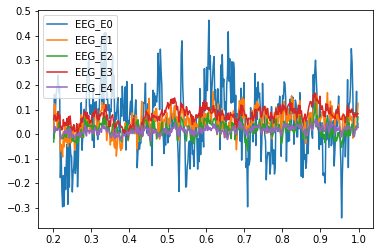

In [11]:
fig, ax = plt.subplots()  

ax.plot(time,eeg_signals.T)
label_electrodes = ["EEG_E%d"%i for i in range(numElec)]
ax.legend(label_electrodes,loc="best")

plt.show()


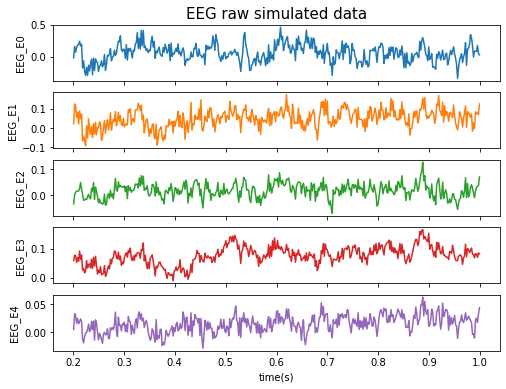

In [12]:
fig, ax = plt.subplots(numElec, 1, figsize=(8,6), sharex=True)  

for i in range(eeg_signals.shape[0]):
    ax[i].plot(time, eeg_signals[i,:], color="C%d"%i)
    ax[i].set_ylabel("EEG_E%d"%i)
ax[0].set_title("EEG raw simulated data", size=15)

plt.xlabel("time(s)")
#plt.savefig("eeg_raw.png", dpi=300, facecolor="white", bbox_inches="tight")

plt.show()


In [13]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [14]:
eeg_filtered = butter_bandpass_filter(eeg_signals, 1, 50, fs=sampling_freq/4)


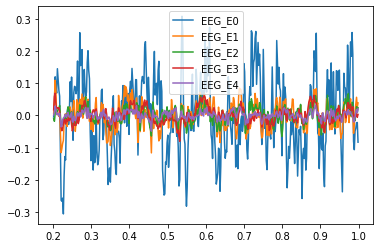

In [15]:
fig, ax = plt.subplots()        
ax.plot(time, eeg_filtered.T)

label_electrodes = ["EEG_E%d"%i for i in range(numElec)]
ax.legend(label_electrodes,loc="best")

plt.show()


In [16]:
# Average referencing
# Re-referencing is achieved by creating an average of all scalp channels 
# and subtracting the resulting signal from each channel. After re-referencing, 
# the overall electrical activity (amplitude) across all channels will sum up to zero at each time point.

clean_eeg = deepcopy(eeg_filtered)
clean_eeg = clean_eeg - np.average(eeg_filtered,axis=0)


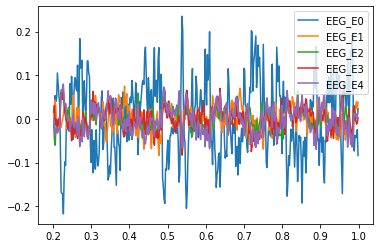

In [17]:
fig, ax = plt.subplots()        
ax.plot(time, clean_eeg.T)

label_electrodes = ["EEG_E%d"%i for i in range(numElec)]
ax.legend(label_electrodes,loc="best")

plt.show()


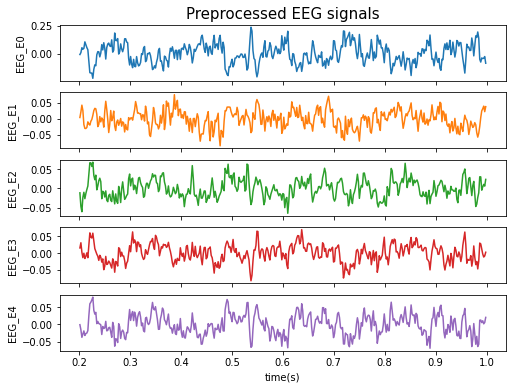

In [18]:
fig, ax = plt.subplots(numElec, 1, figsize=(8,6), sharex=True)  

for i in range(clean_eeg.shape[0]):
    ax[i].plot(time, clean_eeg[i,:], color="C%d"%i)
    ax[i].set_ylabel("EEG_E%d"%i)
ax[0].set_title("Preprocessed EEG signals", size=15)

plt.xlabel("time(s)")
#plt.savefig("eeg_preprocessed.png", dpi=300, facecolor="white", bbox_inches="tight")

plt.show()


In [19]:
# Inverse problem:

# A X = b
# A = A_norm
# X = source activations
# b = eeg signals

# X = A.T (A.A^T)^-1 b

X = np.matmul( np.matmul( A_norm.T, np.linalg.inv( np.matmul( A_norm, A_norm.T) ) ), clean_eeg )





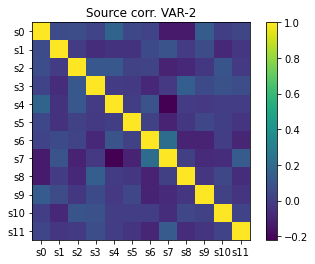

In [21]:
time = np.arange(0.1, 1, 1/sampling_freq)


plt.imshow(np.corrcoef(sn[:,time>0.2]))
plt.xticks(range(numSrc), ["s%d"%i for i in range(numSrc) ])
plt.yticks(range(numSrc), ["s%d"%i for i in range(numSrc) ])
plt.colorbar()
#plt.savefig("sn_corr.png", dpi=300, facecolor="white", bbox_inches="tight")
plt.title("Source corr. VAR-2")
plt.show()

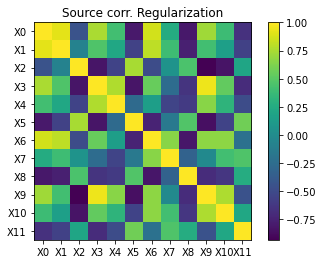

In [23]:
plt.imshow(np.corrcoef(X))
plt.xticks(range(numSrc), ["X%d"%i for i in range(numSrc) ])
plt.yticks(range(numSrc), ["X%d"%i for i in range(numSrc) ])
plt.colorbar()
#plt.savefig("Xn_corr.png", dpi=300, facecolor="white", bbox_inches="tight")
plt.title("Source corr. Regularization")
plt.show()

In [24]:
# Corr coef between the 2 Covariance matrices

np.corrcoef(np.corrcoef(X).flatten(), np.corrcoef(sn[:,time>0.2]).flatten() )

array([[1.        , 0.45071636],
       [0.45071636, 1.        ]])